# Homework 9

Run the code given below to create 400 simulated 2-dimensional observations ```X``` and corresponding true labels ```y_true```. True labels range from 0 to 3. 

Also, we're creating a scatterplot of the data and indicating group membership by use of the four colors magenta (group 0), green (group 1), yellow (group 2), blue (group 3), respectively. 

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


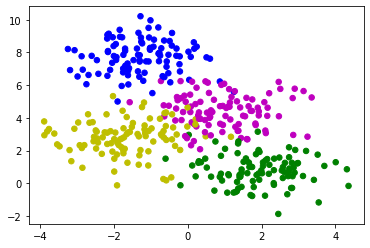

In [3]:
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=400, centers=4,
                                  cluster_std=1, center_box=(-10.0, 10.0), random_state=0) 

fig, axe = plt.subplots()
colors = ('m', 'g', 'y', 'b')
axe.scatter(X[:, 0], X[:, 1], c = [colors[y_true[i]] for i in range(len(y_true))], s=30); 

## Problem 1

(a) Consider the data (X,y_true) that were simulated above to be your training data. Use the Gaussian Naive Bayes algorithm to predict the label color of the point x with coordinates (0,4) "by-hand". Show your work. You can compute multivariate normal densities using the ```scipy.stats``` module or by using your calculator. Please state which method you used in your answer.  

Optional code box:

In [4]:
# first, find sample mean vectors and sample covariance matrices of the four separate groups

import numpy as np
from scipy.stats import multivariate_normal

means = []
cov = []

for i in range(4):
    idx = (y_true==i)
    means.append(np.mean(X[idx,:],axis = 0))
    cov.append(np.cov(X[idx,:].T))
    
# Then compute the multivariate Normal density at the given point x=(0,4) for each of the four distributions

densities = []

for i in range(4):
    rv = multivariate_normal(means[i], cov[i])
    densities.append(rv.pdf((0,4)))
    
colors[np.array(densities).argmax()] # assign label for the group that produces the highest density value

'm'

Explain your code or show your work and state your answer here. If you are not using Python, but some other approach, make sure you explain how you come up with your answer. 

We first need to estimate the mean vector and covariance matrix of each of the four groups of points from the data. Then, we use those estimates to compute the values of the four multivariate Normal densities at the given point (0,4). The estimates $P(L_i)$ are all the same (equal to 0.25) since we have equally many points in the four groups. 
Hence, the most likely group is the one where the density is the highest. In this case that is the case for group with index 0 (and color 'Magenta' - the pinkish points in the scatterplot above). 

(b) Use SciKit-Learn to apply the Gaussian Naive Bayes classification algorithm to all points ```X``` that you simulated and create a predicted label for each point. Produce another scatterplot showing the 400 points in ```X``` but this time color points by their labels predicted through the Gaussian Naive Bayes method. 

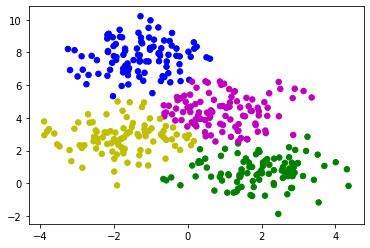

In [5]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y_true)
y_predict = model.predict(X)

fig, axe = plt.subplots()
axe.scatter(X[:, 0], X[:, 1], c = [colors[y_predict[i]] for i in range(len(y_predict))], s=30); 

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from (b)) to the true labels ```y_true```. Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the Gaussian Naive Bayes algorithm?

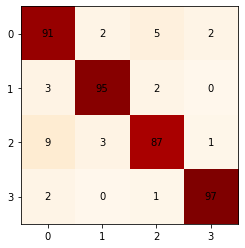

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np

mat = confusion_matrix(y_true, y_predict, labels=[0,1,2,3])

mat

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels([0,1,2,3]) # label ticks 
ax.set_yticklabels([0,1,2,3]) 
ax.set_ylim(len(mat)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

for i in range(4): # Loop over data dimensions and create text annotations:
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");

(91+95+87+97)/400 = 92.5\% of points are classified correctly by the Gaussian Naive Bayes method. 

## Problem 2

(a) Use SciKit-Learn to apply the k-means clustering algorithm (with k=4) to only the ```X``` matrix of the simulated data. For the resulting four clusters, use a majority vote over the true ```y_true``` labels to assign each cluster a label. 

**Hint:** we did something extremely similar in the clustering/classification of handwritten digits example we did in class. 

In [8]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

from scipy.stats import mode

labels_kmeans = np.zeros_like(y_kmeans) # make empty NP array of clusters

for i in range(4):
    mask = (y_kmeans == i)       # pick out data one cluster at a time
    labels_kmeans[mask] = mode(y_true[mask])[0] 
        # take the most common true label in each group as the label

(b) Produce another scatterplot showing the 400 points in ```X``` and use the labels produced in Problem 2 (a) to color the points. 

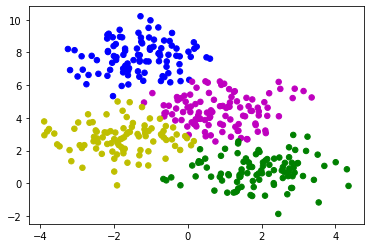

In [9]:
fig, axe = plt.subplots()
axe.scatter(X[:, 0], X[:, 1], c = [colors[labels_kmeans[i]] for i in range(len(labels_kmeans))], s=30); 

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 2 (b)) to the true labels ```y_true```.  Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the k-means algorithm (with following majority vote over true labels)?

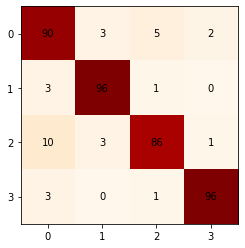

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

mat = confusion_matrix(y_true, labels_kmeans, labels=[0,1,2,3])

mat

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels([0,1,2,3]) # label ticks with newsgroups
ax.set_yticklabels([0,1,2,3]) 
ax.set_ylim(len(mat)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

for i in range(4): # Loop over data dimensions and create text annotations:
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");

(90+96+86+96)/400 = 92\% of the points are classified correctly the by k-means algorithm. 

## Problem 3

(a) Use SciKit-Learn to fit a decision tree to the simulated data ```(X,y_true)```. Set the ```max_depth``` of the tree to 3 (to make three nodes in your tree and end up with four different "leaves" on your tree).

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

np.random.seed(10)
tree = DecisionTreeClassifier(max_depth=3) #
fitted = tree.fit(X, y_true)

y_tree = tree.predict(X)

(b) Produce another scatterplot showing the 400 points in ```X``` and use the labels produced by the Decision Tree procedure in Problem 4 (a) to color the points. 

In [ ]:
fig, axe = plt.subplots()
axe.scatter(X[:, 0], X[:, 1], c = [colors[y_tree[i]] for i in range(len(y_tree))], s=30); 

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 4 (a)) to the true labels ```y_true``` from Problem 1. Which percentage of points are predicted correctly by the decision tree? Display your confusion matrix as a heat map like we did in class. 

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

mat = confusion_matrix(y_true, y_tree, labels=[0,1,2,3])

mat

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels([0,1,2,3]) # label ticks with newsgroups
ax.set_yticklabels([0,1,2,3]) 
ax.set_ylim(len(mat)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

for i in range(4): # Loop over data dimensions and create text annotations:
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");

(93+97+90+96)/400= 94\% of the data are classified correctly through the decition tree algorithm. 

## Problem 4

Describe what differences you observe between the three different methods you applied. What differences can you see in the three scatter plots in terms of shapes of predicted point clouds? Which method seems to "best" represent the four original groups? In which sense is the separation into original groups the best? Explain. 

The shape of our elliptical "blobs" is perhaps best represented by the results of the Naive Bayes algorithm. The k-means algorithm ignores the fact that our data has different variance in the two coordinates of X. The blobs derived from the decision tree become more rectangular due to the perpendicular decision boundaries used by this method. 

In terms of percentage of simulated observations correctly classified, the decision tree algorithm does better than the other two, however with 94\% of observations correctly classified (compared to 92.5\% and 92\% achieved by the other two methods). 